# Covid-19 (Coronavirus) Analytics and Forecasting

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")
#sns.palplot(sns.color_palette("Paired", n_colors=15))

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_cases_pct = pd.read_csv('Datasets/JH/jh_hist_countries_cases_pct.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_cases_pct_ewma.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_countries_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_countries_deaths_pct.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_countries_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_deaths_pct_ewma.csv', index_col=0, parse_dates=True)

In [13]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [14]:
jh_hist_countries_recovered_pct = pd.read_csv('Datasets/JH/jh_hist_countries_recovered_pct.csv', index_col=0, parse_dates=True)

In [15]:
jh_hist_countries_recovered_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_recovered_pct_ewma.csv', index_col=0, parse_dates=True)

In [16]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [17]:
jh_hist_usstates_cases_pct = pd.read_csv('Datasets/JH/jh_hist_usstates_cases_pct.csv', index_col=0, parse_dates=True)

In [18]:
jh_hist_usstates_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_usstates_cases_pct_ewma.csv', index_col=0, parse_dates=True)

In [19]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [20]:
jh_hist_usstates_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths_pct.csv', index_col=0, parse_dates=True)

In [21]:
jh_hist_usstates_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths_pct_ewma.csv', index_col=0, parse_dates=True)

In [22]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [23]:
jh_hist_uscounties_cases_pct = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases_pct.csv', index_col=0, header=[0,1], parse_dates=True)

In [24]:
jh_hist_uscounties_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases_pct_ewma.csv', index_col=0, header=[0,1], parse_dates=True)

In [25]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

In [26]:
jh_hist_uscounties_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths_pct.csv', index_col=0, header=[0,1], parse_dates=True)

In [27]:
jh_hist_uscounties_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths_pct_ewma.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [28]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-07-13 00:00:00')

In [29]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-07-12 00:00:00')

In [30]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [31]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,12910357
Deaths,569128
Recovered,7116957
Active,5224272


In [32]:
# Top countries by confirmed count as of latest date
top_20_countries = jh_live_countries.nlargest(20, 'Confirmed')
top_10_countries = jh_live_countries.nlargest(10, 'Confirmed')
top_10_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,3304942,135205,1006326,2163411,2020-07-13 04:43:04,38.327657,-91.743556
Brazil,1864681,72100,1264843,527738,2020-07-13 04:43:04,-12.669522,-48.480493
India,878254,23174,553471,301609,2020-07-13 04:43:04,23.356511,82.081064
Russia,726036,11318,500208,214510,2020-07-13 04:43:04,54.546312,62.120860
Peru,326326,11870,217111,97345,2020-07-13 04:43:04,-10.637324,-75.277744


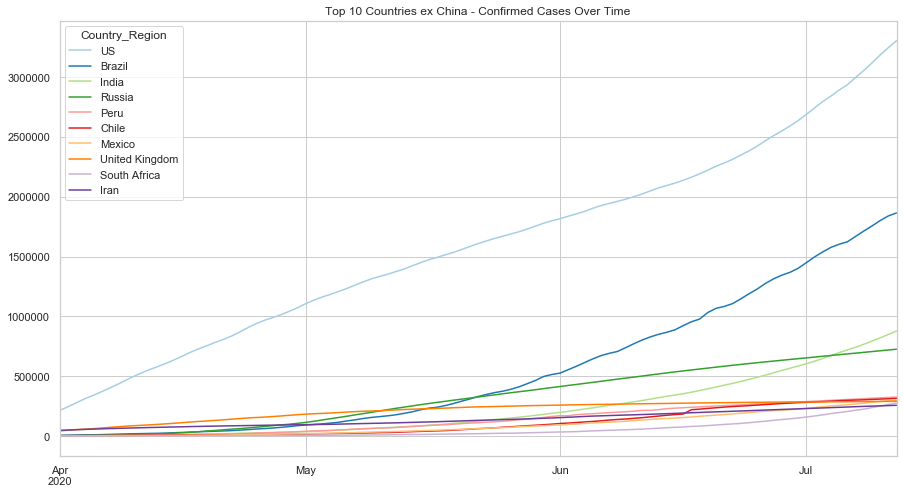

In [33]:
# Plot the top 10 countries confirmed infections over time
jh_hist_countries_cases[top_10_countries.index].loc[zoom_date2:, top_10_countries.index].plot(figsize=(15,8), title="Top 10 Countries ex China - Confirmed Cases Over Time")

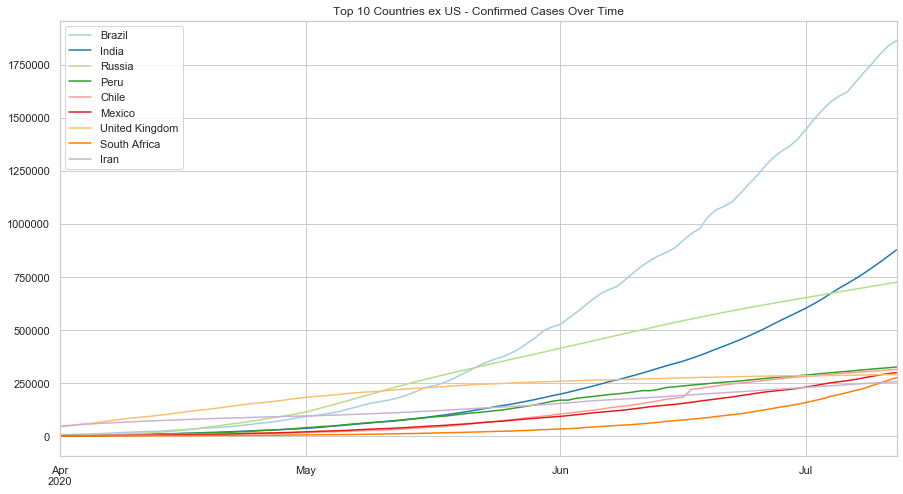

In [34]:
# Same chart but excluding US and starting on April 1 to zoom in
jh_hist_countries_cases[top_10_countries.index].loc[zoom_date2:, top_10_countries.index != 'US'].plot(figsize=(15,8), title="Top 10 Countries ex US - Confirmed Cases Over Time")

### US State Level

In [35]:
# Top US States by confirmed cases
top_20_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_10_states = jh_live_usstates.nlargest(10, 'Confirmed')
top_10_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,401706,32350,0,369356,2020-07-13 04:43:04,42.671593,-75.579694
California,324543,7051,0,317492,2020-07-13 04:43:04,37.778248,-120.728666
Florida,269811,4242,0,265569,2020-07-13 04:43:04,28.940755,-82.700744
Texas,262762,3216,0,259546,2020-07-13 04:43:04,31.648720,-98.600835
New Jersey,175298,15525,0,159773,2020-07-13 04:43:04,40.286441,-74.622450
Illinois,155048,7388,0,147660,2020-07-13 04:43:04,39.843618,-89.178330
Arizona,122467,2237,0,120230,2020-07-13 04:43:04,33.675904,-111.463232
Georgia,116935,3003,0,113932,2020-07-13 04:43:04,32.808532,-83.577430
Massachusetts,111597,8325,0,103272,2020-07-13 04:43:04,42.176400,-71.577050


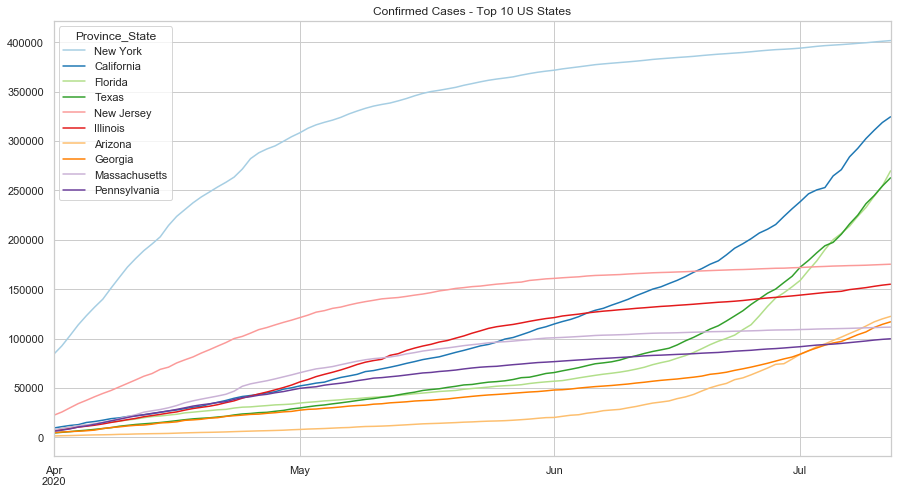

In [36]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_10_states.index].plot(title='Confirmed Cases - Top 10 US States', figsize=(15,8))

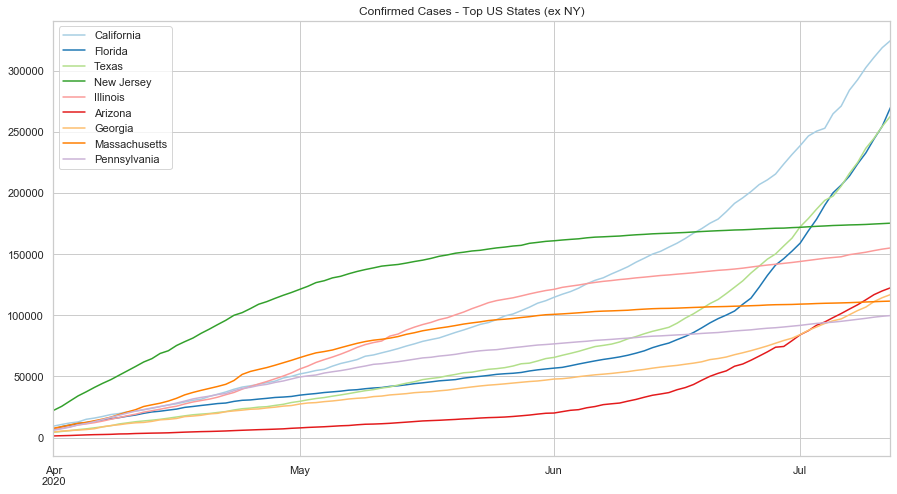

In [37]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_10_states.index].loc[zoom_date2:, top_10_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

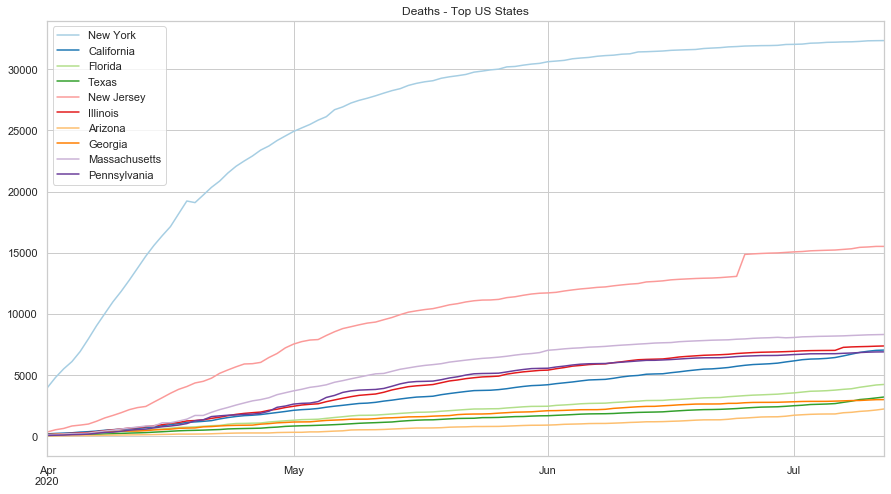

In [38]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_10_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

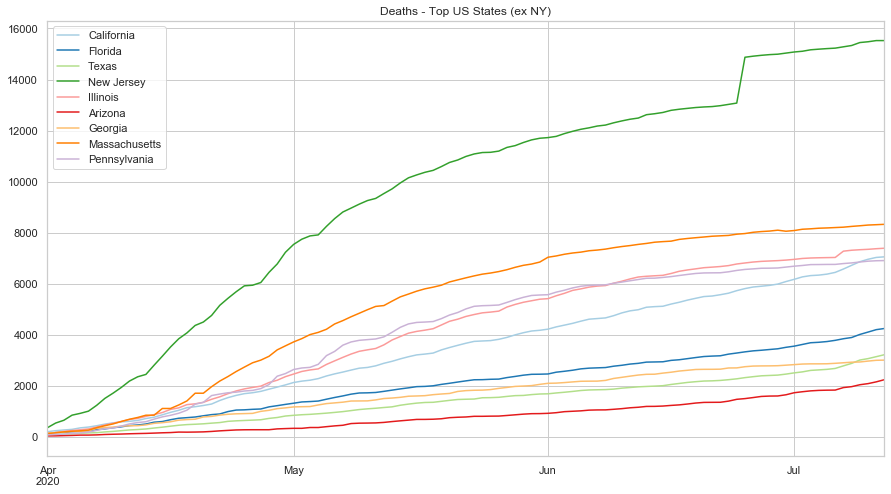

In [39]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_10_states.index].loc[zoom_date2:, top_10_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [40]:
# TODO: CHANGE US COUNTRY SECTION TO TOP COUNTIES WITHIN THE CURRENT TOP XX STATES

In [41]:
top_counties_NY = jh_live_uscounties.loc['New York'].nlargest(10, 'Confirmed')
top_counties_NY.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
New York City,219051,23283,0,195768,2020-07-13 04:43:04,40.767273,-73.971526,36061.0
Nassau,42307,2190,0,40117,2020-07-13 04:43:04,40.740665,-73.589419,36059.0
Suffolk,42028,1993,0,40035,2020-07-13 04:43:04,40.883201,-72.801217,36103.0
Westchester,35297,1435,0,33862,2020-07-13 04:43:04,41.162784,-73.757417,36119.0
Rockland,13716,670,0,13046,2020-07-13 04:43:04,41.150279,-74.025605,36087.0


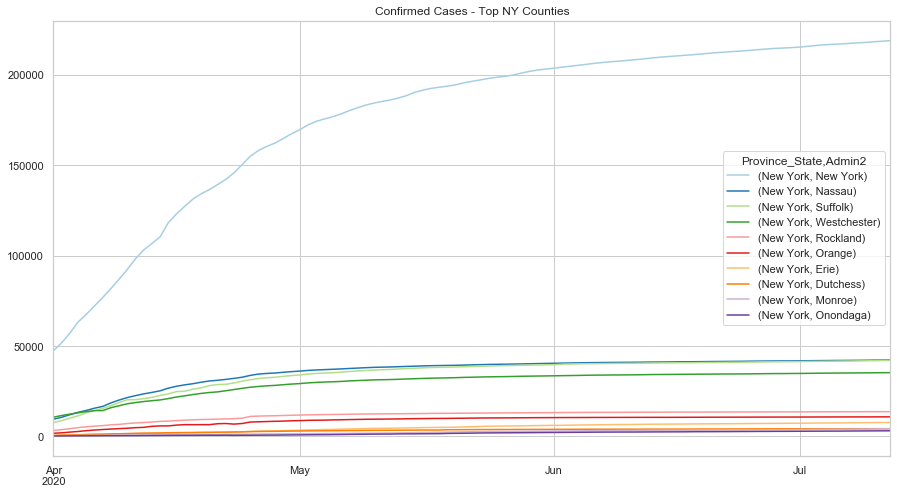

In [42]:
# Chart the NY Counties confirmed cases over time
top_counties_NY_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('New York')].nlargest(10).index
top_counties_NY_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('New York', top_counties_NY_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_NY_cases.plot(title='Confirmed Cases - Top NY Counties', figsize=(15,8))

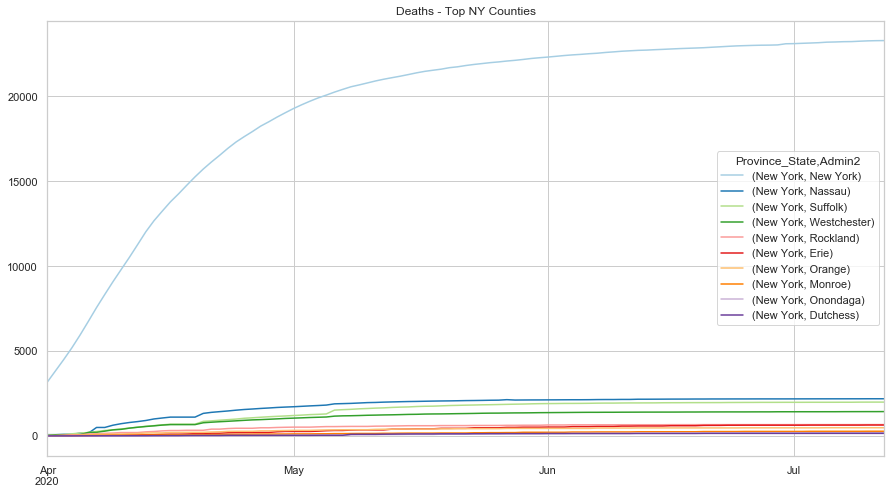

In [43]:
# Chart the NY Counties deaths over time
top_counties_NY_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('New York')].nlargest(10).index
top_counties_NY_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('New York', top_counties_NY_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_NY_deaths.plot(title='Deaths - Top NY Counties', figsize=(15,8))

In [44]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,24483,1916,0,22567,2020-07-13 04:43:04,42.486077,-71.390492,25017.0
Suffolk,20301,1020,0,19281,2020-07-13 04:43:04,42.327951,-71.078504,25025.0
Essex,16469,1137,0,15332,2020-07-13 04:43:04,42.668763,-70.946872,25009.0
Worcester,12648,958,0,11690,2020-07-13 04:43:04,42.350270,-71.904934,25027.0
Norfolk,9462,958,0,8504,2020-07-13 04:43:04,42.160731,-71.205304,25021.0


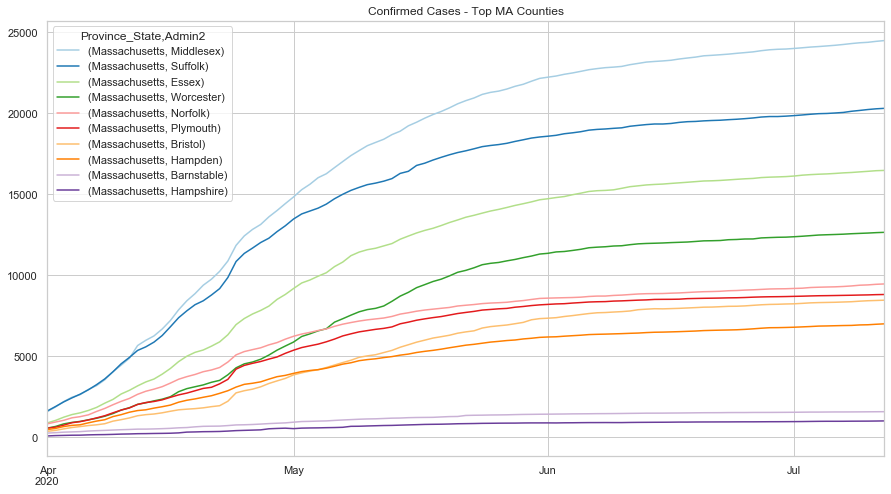

In [72]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

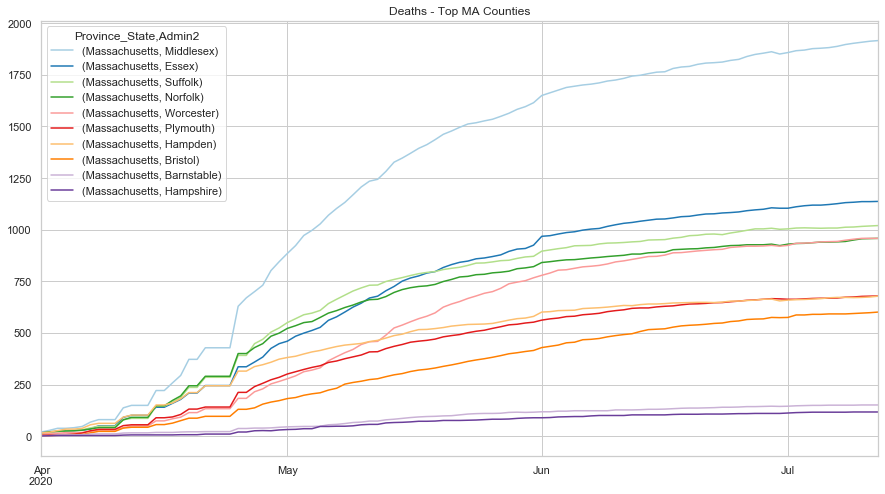

In [46]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [47]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,133549,3809,0,129740,2020-07-13 04:43:04,34.308284,-118.228241,6037.0
Riverside,24765,537,0,24228,2020-07-13 04:43:04,33.743150,-115.993358,6065.0
Orange,24715,423,0,24292,2020-07-13 04:43:04,33.701475,-117.764600,6059.0
San Diego,19371,422,0,18949,2020-07-13 04:43:04,33.034846,-116.736533,6073.0
San Bernardino,19043,306,0,18737,2020-07-13 04:43:04,34.840603,-116.177469,6071.0
Fresno,8282,88,0,8194,2020-07-13 04:43:04,36.757339,-119.646695,6019.0
Imperial,7827,135,0,7692,2020-07-13 04:43:04,33.039308,-115.366904,6025.0


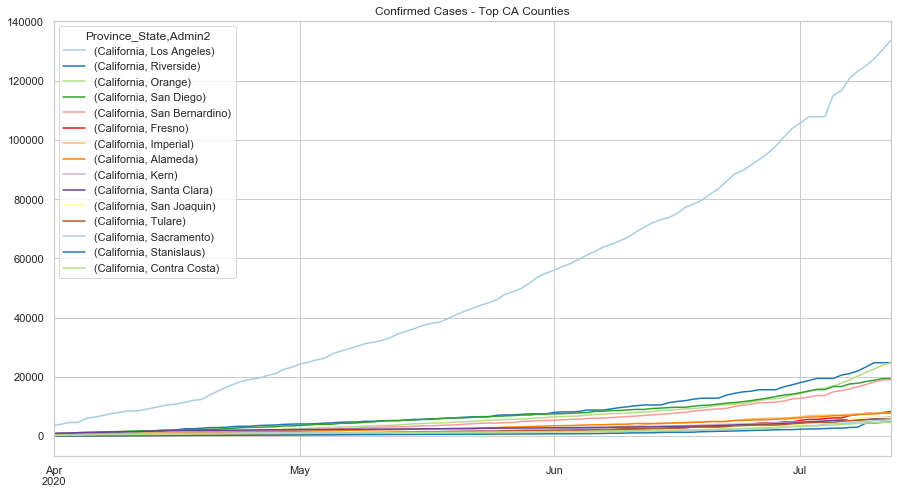

In [48]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

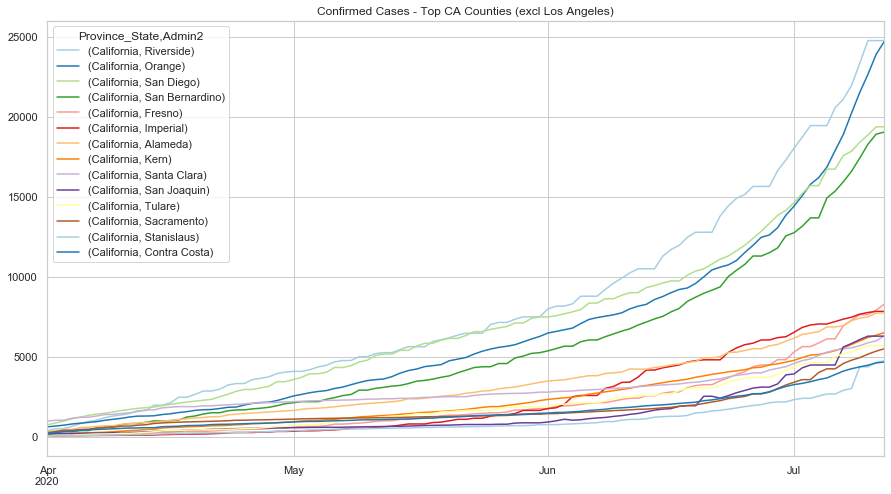

In [49]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

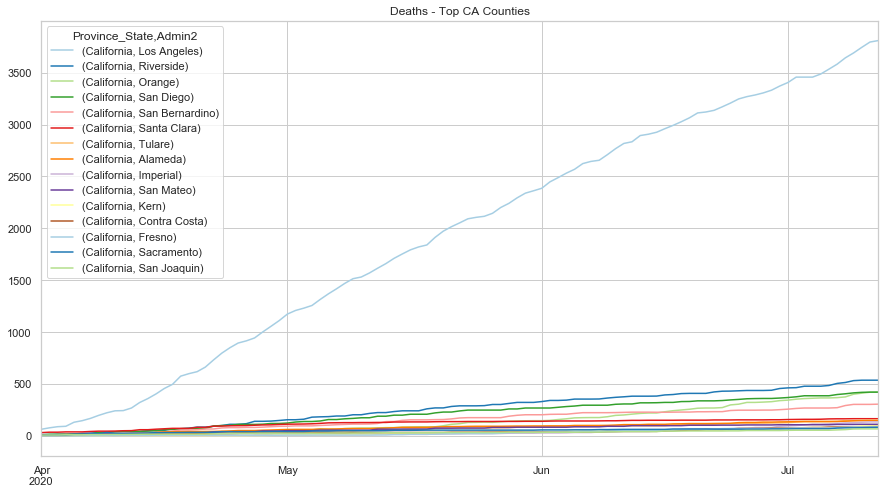

In [50]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

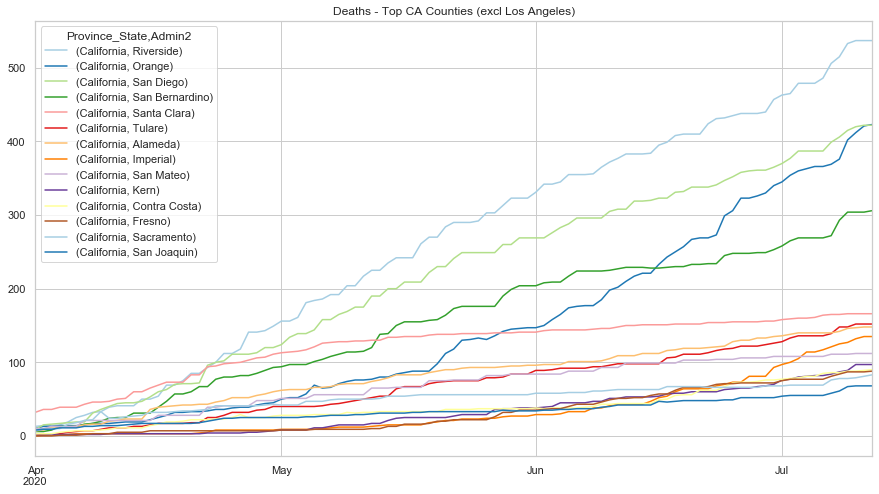

In [51]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### Which Countries / US States / US Counties are becoming hot spots, or conversely, cooling down?  
This section uses the daily percentage changes, smoothed by an exponentially weighted moving average to minimize daily outliers, while giving more weight to more recent data vs what a simple moving average would.  

#### Prominent Countries

For reference, start by showing the recent EWMA of daily % change for prominent countries (making headlines related to Covid-19)

In [52]:
prominent_countries_filter = ['US', 'China', 'Brazil', 'Russia', 'Italy', 'United Kingdom']
prominent_countries = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, prominent_countries_filter]
prominent_countries

US                0.019063
China             0.000554
Brazil            0.018467
Russia            0.009233
Italy             0.000920
United Kingdom    0.002322
Name: 2020-07-12 00:00:00, dtype: float64

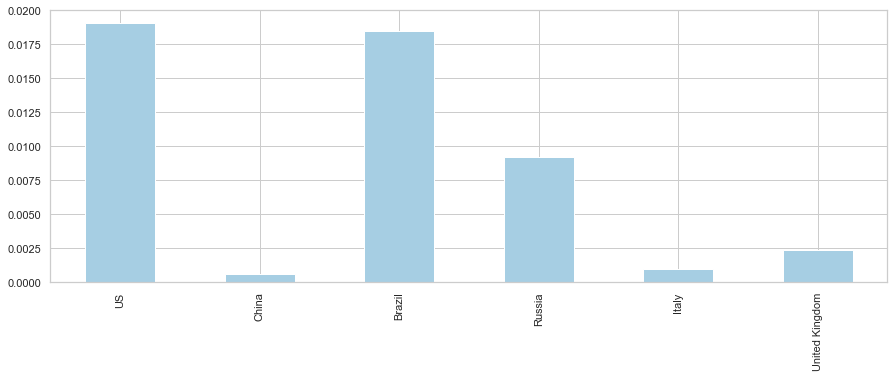

In [53]:
prominent_countries.plot(kind='bar', figsize=(15,5))

#### Hot Spots - Countries

*First, filter to only include countries with > 7,500 confirmed cases to exclude lesser affected countries*

In [54]:
countries_impacted_filter = jh_hist_countries_cases.loc[jh_hist_date]>7500
countries_impacted = jh_hist_countries_cases.loc[:, countries_impacted_filter].columns

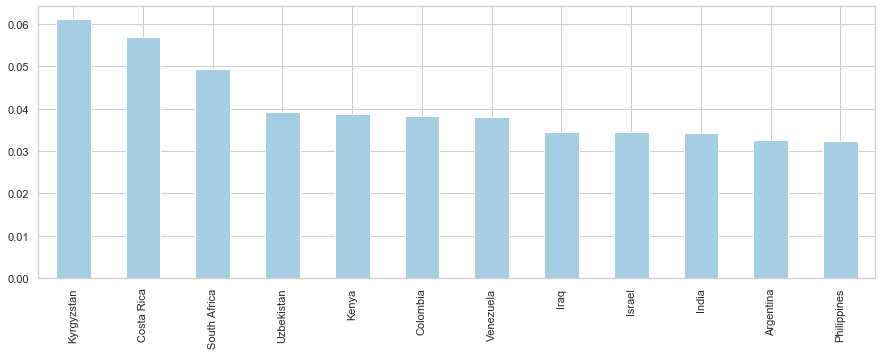

In [55]:
countries_hot_spots = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, countries_impacted].nlargest(12)
countries_hot_spots.plot(kind='bar', figsize=(15,5))

In [56]:
countries_hot_spots = countries_hot_spots.index.values

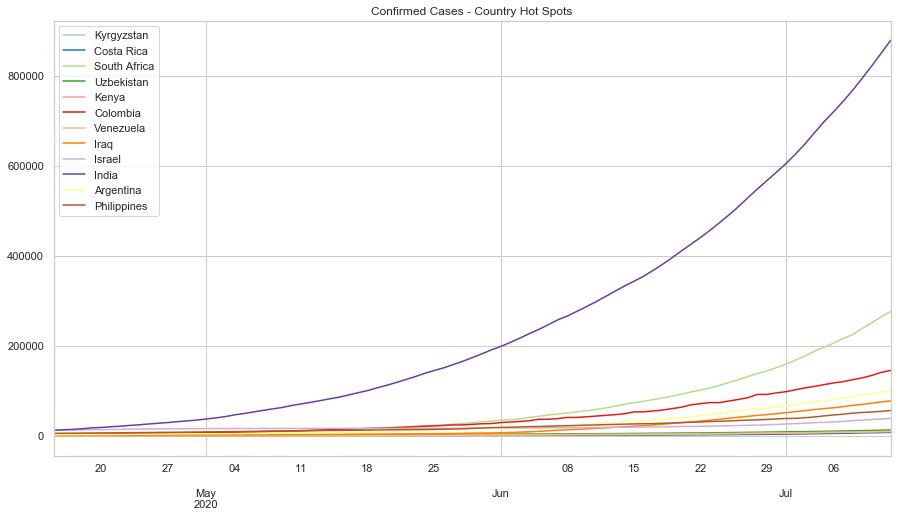

In [57]:
jh_hist_countries_cases.loc[zoom_date3:, countries_hot_spots].plot(title='Confirmed Cases - Country Hot Spots', figsize=(15,8))

**For comparison sake, include US, Russia, Brazil**

In [58]:
countries_hot_spots = np.append(countries_hot_spots, 'US')
countries_hot_spots = np.append(countries_hot_spots, 'Russia')
countries_hot_spots = np.append(countries_hot_spots, 'Brazil')

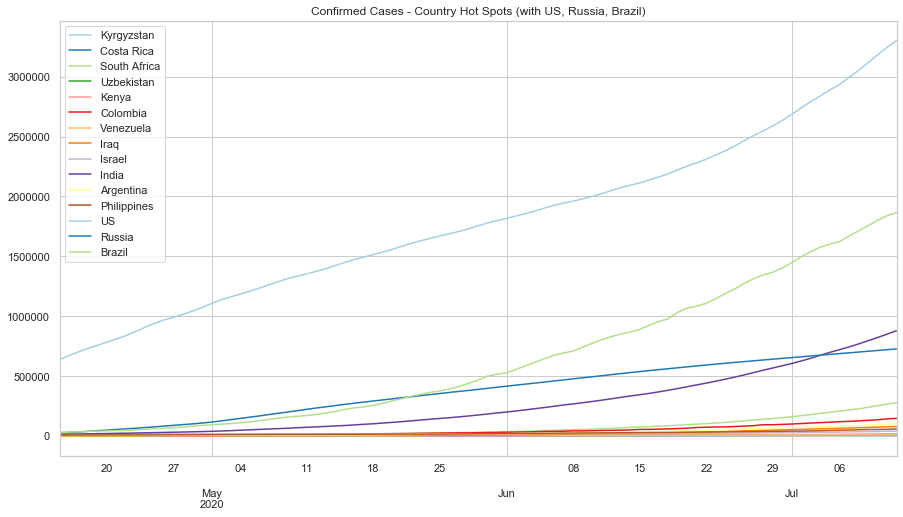

In [59]:
jh_hist_countries_cases.loc[zoom_date3:, countries_hot_spots].plot(title='Confirmed Cases - Country Hot Spots (with US, Russia, Brazil)', figsize=(15,8))

#### Cooling Down - Countries

*Note: this uses the same impacted countries filter used above for the hot spots to exclude countries with very small total case counts*

In [60]:
countries_cooling_down = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, countries_impacted].nsmallest(15)
countries_cooling_down

Denmark           0.000434
China             0.000554
Norway            0.000578
Spain             0.000666
Ireland           0.000735
France            0.000882
Italy             0.000920
Malaysia          0.001296
Germany           0.001416
Netherlands       0.001625
Sweden            0.001837
Canada            0.002019
United Kingdom    0.002322
Belarus           0.002684
Sudan             0.002727
Name: 2020-07-12 00:00:00, dtype: float64

In [61]:
countries_cooling_down = countries_cooling_down.index.values

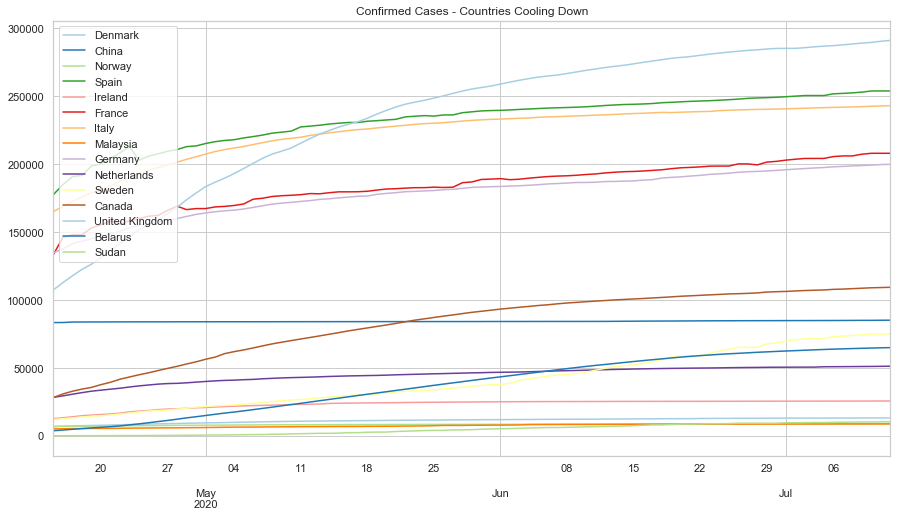

In [62]:
jh_hist_countries_cases.loc[zoom_date3:, countries_cooling_down].plot(title='Confirmed Cases - Countries Cooling Down', figsize=(15,8))

#### Hot Spots - US States

*First, filter out non-states from the data (Diamond princess, virgin islands, etc).  Use threshold of 500 cases which safely excludes non-states*

In [63]:
actual_states_filter = jh_hist_usstates_cases.loc[jh_hist_date] > 500
actual_states = jh_hist_usstates_cases.loc[jh_hist_date, actual_states_filter].index.values

In [64]:
usstates_hot_spots = jh_hist_usstates_cases_pct_ewma.loc[jh_hist_date, actual_states].nlargest(12)
usstates_hot_spots

Alaska            0.055236
Montana           0.055058
Florida           0.052006
Idaho             0.046496
South Carolina    0.037158
Texas             0.036470
Nevada            0.033070
West Virginia     0.031867
Alabama           0.030742
Oklahoma          0.029115
Oregon            0.028552
Puerto Rico       0.027475
Name: 2020-07-12 00:00:00, dtype: float64

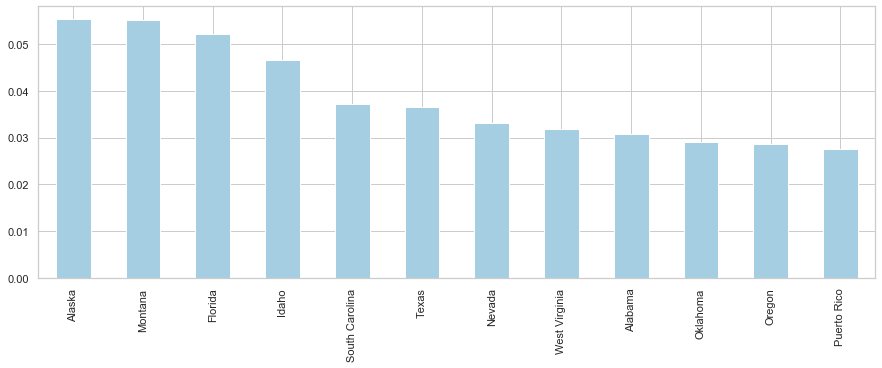

In [65]:
usstates_hot_spots.plot(kind='bar', figsize=(15,5))

In [66]:
usstates_hot_spots = usstates_hot_spots.index.values

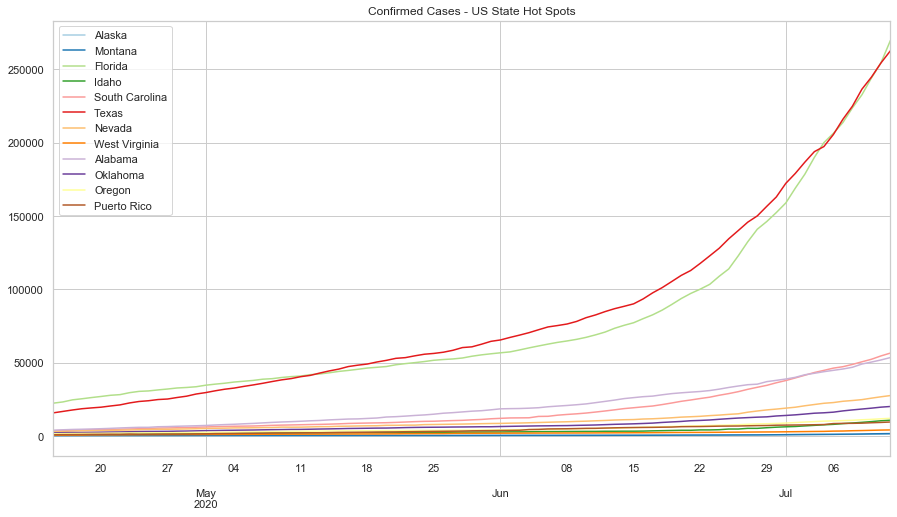

In [67]:
jh_hist_usstates_cases.loc[zoom_date3:, usstates_hot_spots].plot(title='Confirmed Cases - US State Hot Spots', figsize=(15,8))

#### Cooling Down - US States

In [68]:
usstates_cooling_down = jh_hist_usstates_cases_pct_ewma.loc[jh_hist_date, actual_states].nsmallest(10)
usstates_cooling_down

Connecticut             0.000456
Rhode Island            0.000890
New York                0.001738
New Jersey              0.001861
Massachusetts           0.002076
New Hampshire           0.004671
District of Columbia    0.004789
Maine                   0.005471
Delaware                0.006209
Michigan                0.006875
Name: 2020-07-12 00:00:00, dtype: float64

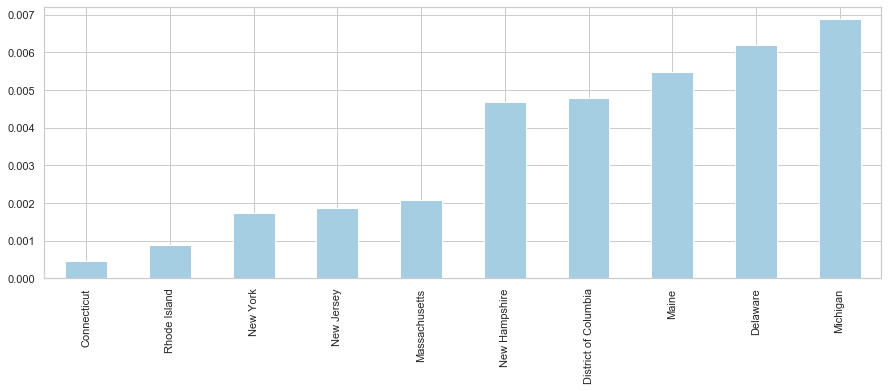

In [69]:
usstates_cooling_down.plot(kind='bar', figsize=(15,5))

In [70]:
usstates_cooling_down = usstates_cooling_down.index.values

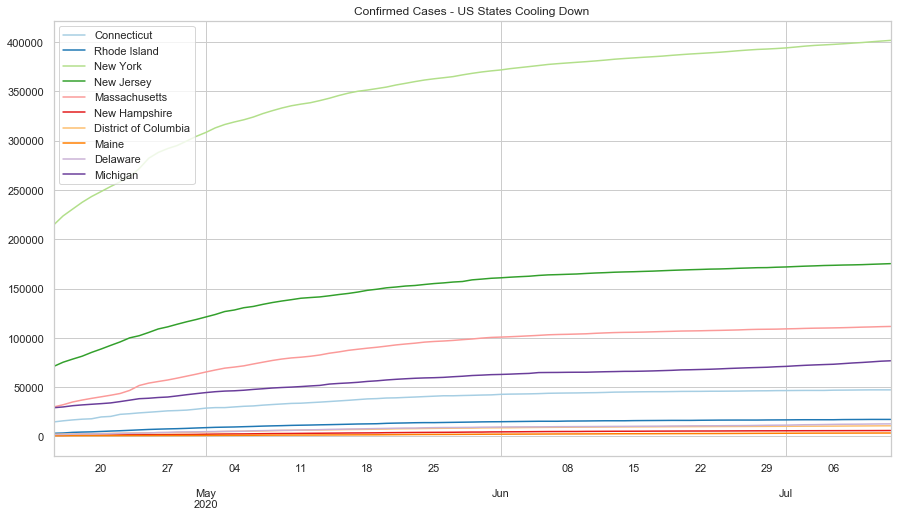

In [71]:
jh_hist_usstates_cases.loc[zoom_date3:, usstates_cooling_down].plot(title='Confirmed Cases - US States Cooling Down', figsize=(15,8))

#### Hot Spots - US Counties

`TODO - LOOK UP HOT SPOT COUNTIES WITHIN HOT SPOT STATES`

#### Cooling Down - US Counties

`TODO (POSSIBLY) - MAY NOT BE RELEVANT INFO SINCE THERE ARE A HUGE NUMBER OF COUNTIES WITH SMALL POPULATIONS`

**TODO NEXT:**  
- Finish ETL data wrangling and exporting with CTP and NYT data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
  - Add metrics based on poulation data (% of population infected, etc)
- Create new datasets that align start as of xx cases
    - 100+ confirmed cases
    - 10+ deaths
- Consider adding other datasets (Google location tracking?)
- More EDA and Data Viz
- Perform forecasting using the historic time series data
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have